# Make plots of picks from ELEP

In [1]:
import os
import sys
import pandas as pd
# from obspy import UTCDateTime,Stream
# from obspy.clients.fdsn import Client
# from pnwstore.mseed import WaveformClient
# from obspy.geodetics import locations2degrees, degrees2kilometers
# import matplotlib.pyplot as plt
# import numpy as np
# from mpl_toolkits.basemap import Basemap
# from tqdm import tqdm

notebook_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_dir, '../'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from plot_utils_temp import *


In [2]:
# Pick only the events less than 10 km deep
year = 'all_regions'
new_events = pd.read_csv(f'/wd1/hbito_data/data/datasets_{year}/new_events_reloc_cog_120s_1000km.csv')

picks = pd.read_csv('/wd1/hbito_data/data/datasets_all_regions/Cascadia_catalog_picks_ver_1.csv')
picks = picks.rename(columns={' ID ':'idx',' Station Name':'station'})

# station_info = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/station_info_Cascadia_catalog_ver_1.csv')

mycatalog_picks = new_events.merge(picks, on='idx', how='left')
# mycatalog_picks = mycatalog_picks.merge(station_info, on='station', how='left')

mycatalog_picks = mycatalog_picks.rename(columns={'datetime':'time','Date':'time_pick',' Phase Type':'phase',' Pick ID':'pick_idx',' Num. Sta':'picks'})

picks = mycatalog_picks

picks = picks.loc[(picks['picks']>=10)&(picks['longitude']>=-127)&(picks['longitude']<=-124.5)
                           &(picks['latitude']>=45.5)&(picks['latitude']<=48)]
print("len(picks['idx'].unique()):", len(picks['idx'].unique()))


len(picks['idx'].unique()): 77


In [4]:
pick_idx = picks.idx.unique()[:3]
picks_selected = picks[picks.idx.isin(pick_idx)]
picks_selected.loc[:, 'phase'] = picks_selected['phase'].str.replace(' ', '')
picks_selected.loc[:, 'station'] = picks_selected['station'].str.replace(' ', '')
picks_selected.loc[:, 'station'] = picks_selected['station'].apply(lambda x: x + '.')
fig_title = f''
dir = '/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/plots_fig3_new_events_reloc_cog_120s_1000km_offshore_WA/'

subplot_waveforms_no_title(picks_selected,dir)

/tmp/ipykernel_3881267/314965758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  picks_selected.loc[:, 'phase'] = picks_selected['phase'].str.replace(' ', '')
/tmp/ipykernel_3881267/314965758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  picks_selected.loc[:, 'station'] = picks_selected['station'].str.replace(' ', '')
/tmp/ipykernel_3881267/314965758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

FDSNNoServiceException: No FDSN services could be discovered at 'http://service.iris.edu'. This could be due to a temporary service outage or an invalid FDSN service address.

In [15]:
mycatalog_picks

Unnamed: 0  latitude  longitude    depth  \
0                0  48.49100 -122.52053   2.2725   
1                0  48.49100 -122.52053   2.2725   
2                0  48.49100 -122.52053   2.2725   
3                0  48.49100 -122.52053   2.2725   
4                0  48.49100 -122.52053   2.2725   
...            ...       ...        ...      ...   
612016       74660  40.75166 -124.46210  17.1770   
612017       74660  40.75166 -124.46210  17.1770   
612018       74660  40.75166 -124.46210  17.1770   
612019       74660  40.75166 -124.46210  17.1770   
612020       74660  40.75166 -124.46210  17.1770   

                                date   Num. P   Num. S  picks  \
0        2011-01-01T04:58:02.624119Z        1        5      5   
1        2011-01-01T04:58:02.624119Z        1        5      5   
2        2011-01-01T04:58:02.624119Z        1        5      5   
3        2011-01-01T04:58:02.624119Z        1        5      5   
4        2011-01-01T04:58:02.624119Z        1        5      5   
...                              ...      ...      ...    ...   
612016   2015-12-31T20:09:39.873650Z        3        5      6   
612017   2015-12-31T20:09:39.873650Z        3        5      6   
612018   2015-12-31T20:09:39.873650Z        3        5      6   
612019   2015-12-31T20:09:39.873650Z        3        5      6   
612020   2015-12-31T20:09:39.873650Z        3        5      6   

         Uncertainty (km)   Detection Value    idx  \
0                  0.3670              0.87      0   
1                  0.3670              0.87      0   
2                  0.3670              0.87      0   
3                  0.3670              0.87      0   
4                  0.3670              0.87      0   
...                   ...               ...    ...   
612016             1.0461              0.84  74660   
612017             1.0461              0.84  74660   
612018             1.0461              0.84  74660   
612019             1.0461              0.84  74660   
612020             1.0461              0.84  74660   

                                    time                    time_pick  \
0       2011-01-01 04:58:02.624119+00:00  2011-01-01T04:58:13.000000Z   
1       2011-01-01 04:58:02.624119+00:00  2011-01-01T04:58:20.530000Z   
2       2011-01-01 04:58:02.624119+00:00  2011-01-01T04:58:28.135000Z   
3       2011-01-01 04:58:02.624119+00:00  2011-01-01T04:58:30.125000Z   
4       2011-01-01 04:58:02.624119+00:00  2011-01-01T04:58:35.024998Z   
...                                  ...                          ...   
612016  2015-12-31 20:09:39.873650+00:00  2015-12-31T20:09:52.490000Z   
612017  2015-12-31 20:09:39.873650+00:00  2015-12-31T20:09:53.068393Z   
612018  2015-12-31 20:09:39.873650+00:00  2015-12-31T20:09:55.760000Z   
612019  2015-12-31 20:09:39.873650+00:00  2015-12-31T20:10:00.010000Z   
612020  2015-12-31 20:09:39.873650+00:00  2015-12-31T20:10:05.630000Z   

         station phase  pick_idx  
0         CN.VGZ     P         0  
1         CN.VGZ     S         1  
2        UW.LRIV     S         2  
3         CN.LZB     S         3  
4        TA.D03D     S         4  
...          ...   ...       ...  
612016    NC.KCT     S    814582  
612017    BK.JCC     S    814583  
612018   NC.KMPB     S    814584  
612019   NC.KHMB     S    814585  
612020    NC.KMR     S    814586  

[612021 rows x 16 columns]

In [16]:
picks

Empty DataFrame
Columns: [Unnamed: 0, latitude, longitude, depth, date,  Num. P,  Num. S, picks,  Uncertainty (km),  Detection Value, idx, time, time_pick, station, phase, pick_idx]
Index: []

In [17]:
new_events = pd.read_csv(f'/home/hbito/cascadia_obs_ensemble_backup/data/datasets_{year}/new_events_reloc_cog.csv')

picks = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/Cascadia_catalog_picks_ver_1.csv')
picks = picks.rename(columns={' ID ':'idx',' Station Name':'station'})

# station_info = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/station_info_Cascadia_catalog_ver_1.csv')

mycatalog_picks = new_events.merge(picks, on='idx', how='left')
# mycatalog_picks = mycatalog_picks.merge(station_info, on='station', how='left')

mycatalog_picks = mycatalog_picks.rename(columns={'datetime':'time','Date':'time_pick',' Phase Type':'phase',' Pick ID':'pick_idx',' Num. Sta':'picks'})

picks = mycatalog_picks

picks = picks.loc[(picks['picks']>=6)&(picks['depth'] < 10)&(picks['longitude']>=-130.5)&(picks['longitude']<=-127.5)
                           &(picks['latitude']>=48.5)&(picks['latitude']<=49.5)&(picks['time']>UTCDateTime('2012-01-01 00:00:00'))]

pick_idx = picks.idx.unique()[10:20]
picks_selected = picks[picks.idx.isin(pick_idx)]
picks_selected.loc[:, 'phase'] = picks_selected['phase'].str.replace(' ', '')
picks_selected.loc[:, 'station'] = picks_selected['station'].str.replace(' ', '')
picks_selected.loc[:, 'station'] = picks_selected['station'].apply(lambda x: x + '.')
# fig_title = f'New Events by GENIE in the Cluster Offshore Vancouver Island. Region: [-127.5,-130.5,48.5,49.5] Depth: [0,10] km'
dir = '/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/plots_fig3_new_events_0-10km_reloc_cog_offshore_Vancouver/'

subplot_waveforms_no_title(picks_selected,dir)


0it [00:00, ?it/s]


100%|██████████| 4/4 [00:19<00:00,  4.94s/it]


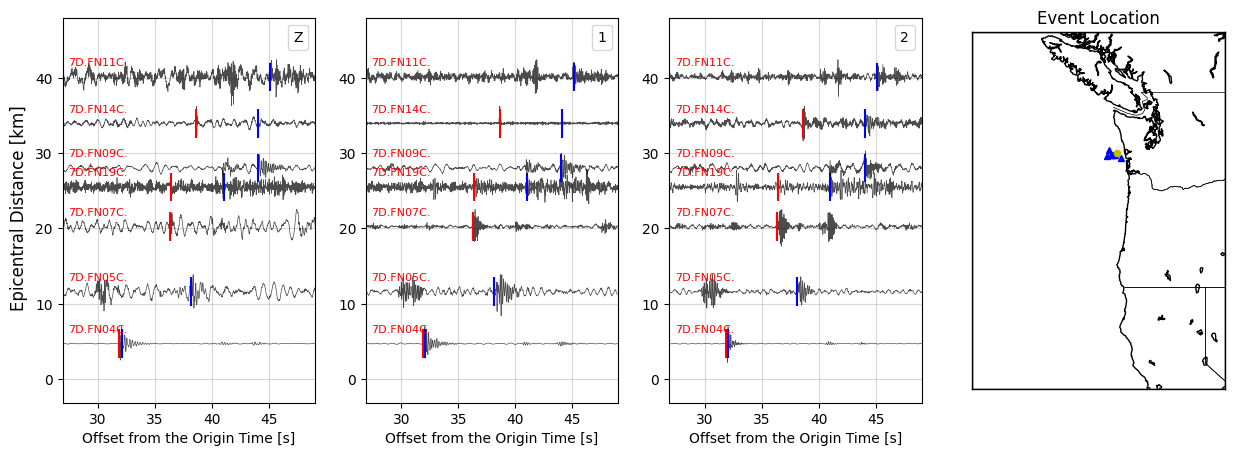

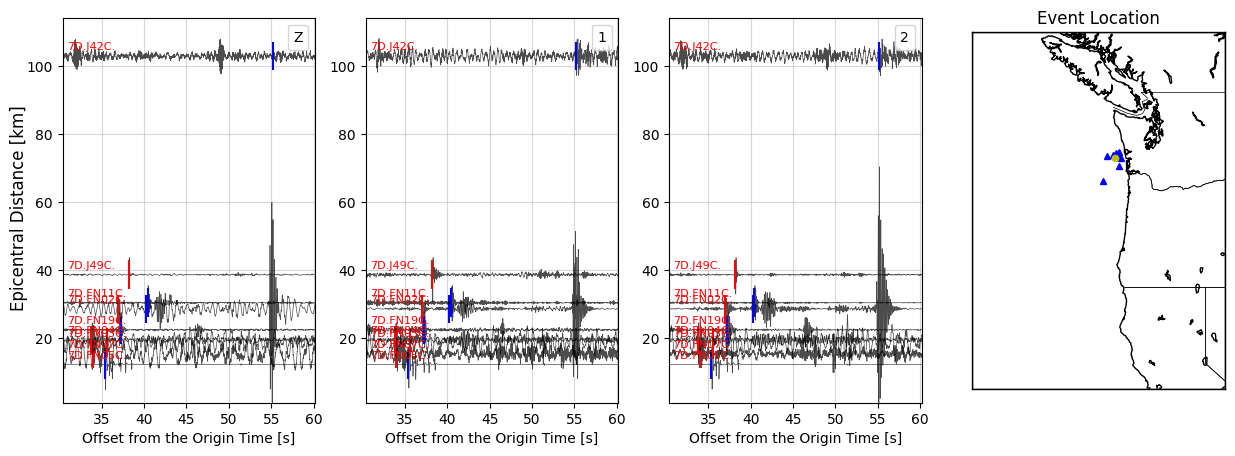

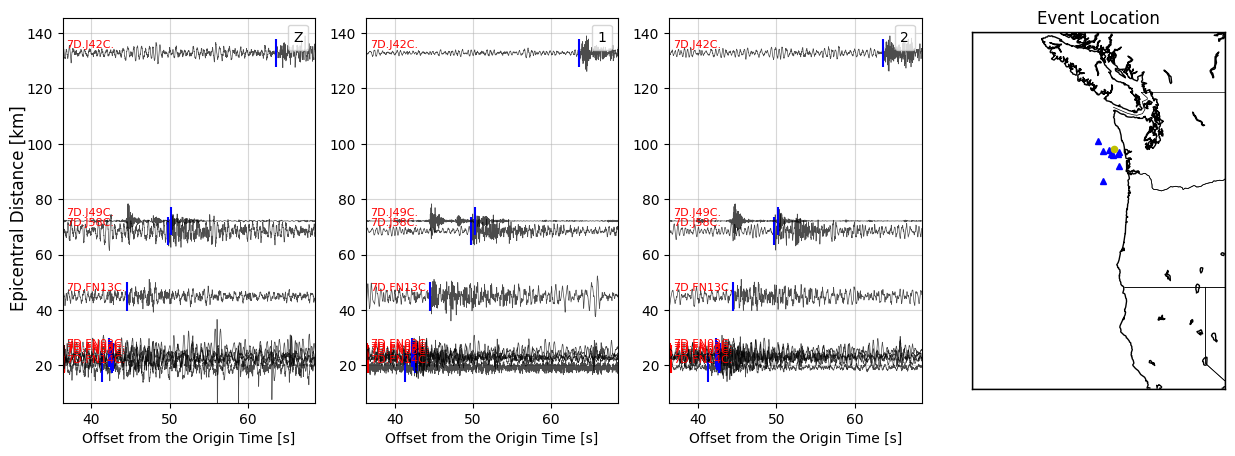

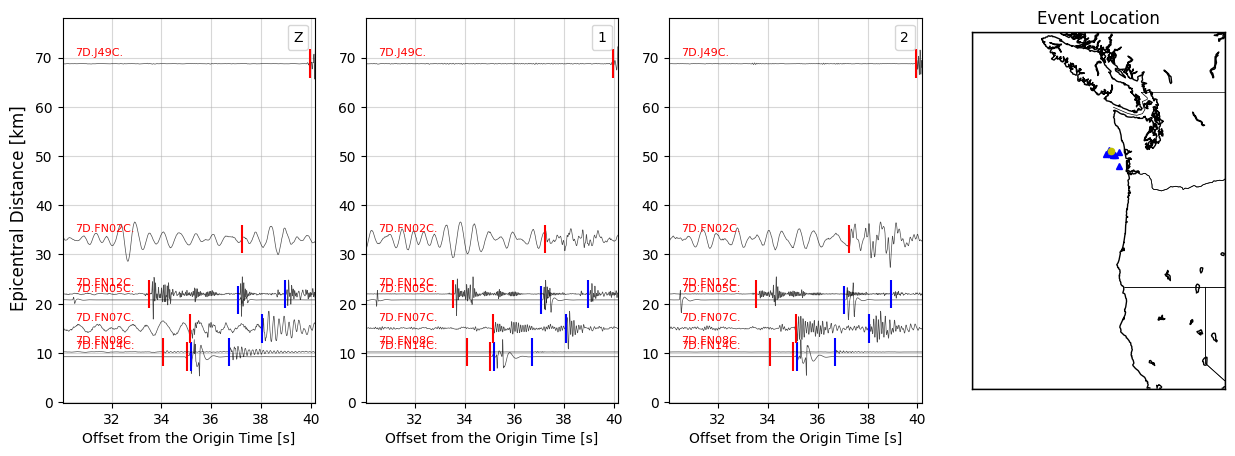

In [19]:
region = 'swa_shelf_trench'
# Load all event data into a list of DataFrames
new_events = pd.read_csv(f'/home/hbito/cascadia_obs_ensemble_backup/data/datasets_{region}/new_event_picks_assoc_cop_ver3.csv')

# new_events = new_events.rename(columns={'datetime':'time'})

# Pick only the events less than 5 km deep
new_events = new_events.loc[(new_events['picks']>=10)&(new_events['longitude']>=-126.5)&(new_events['longitude']<=-124.5)
                           &(new_events['latitude']>=46)&(new_events['latitude']<=48)]

# fig_title = 'New Events in PNSN Washington. Region: [-124.5,-126.5,46,48] Depth: [0,50] km'

dir = f'/home/hbito/cascadia_obs_ensemble_backup/data/datasets_{region}/plots_fig3_new_events_all_depths_{region}_1245-1265_46-48_picks10/'

subplot_waveforms_no_title(new_events,dir)

  0%|          | 0/9 [00:00<?, ?it/s]/home/jupyter_share/miniconda3/envs/seismo/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (25) of bandpass is at or above Nyquist (25.0). Applying a high-pass instead.
  warnings.warn(msg)
/home/jupyter_share/miniconda3/envs/seismo/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (25) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)
 11%|█         | 1/9 [00:26<03:32, 26.53s/it]/home/jupyter_share/miniconda3/envs/seismo/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (25) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)
/home/jupyter_share/miniconda3/envs/seismo/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (25) of bandpass is at or above Nyquist (25.0). Apply

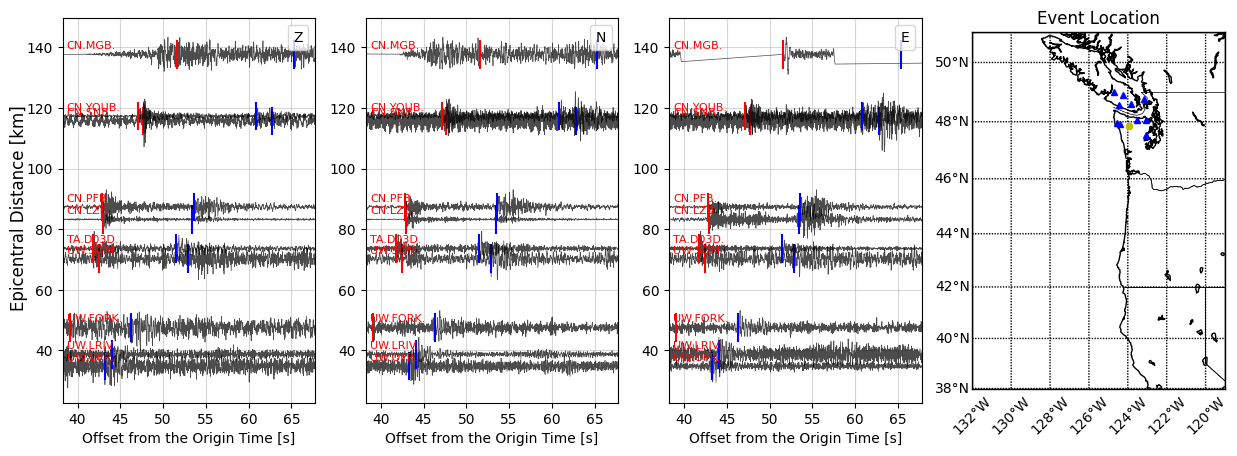

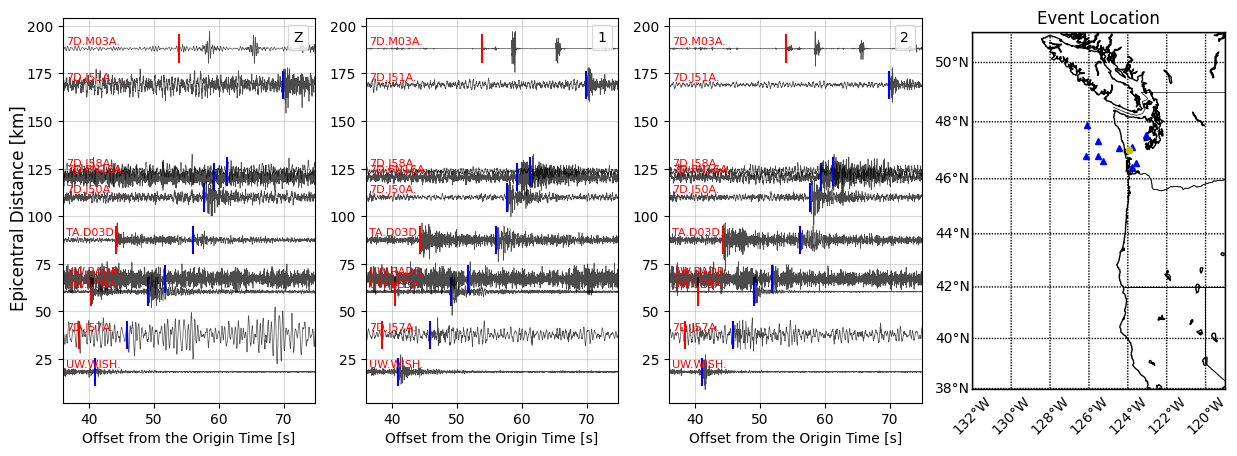

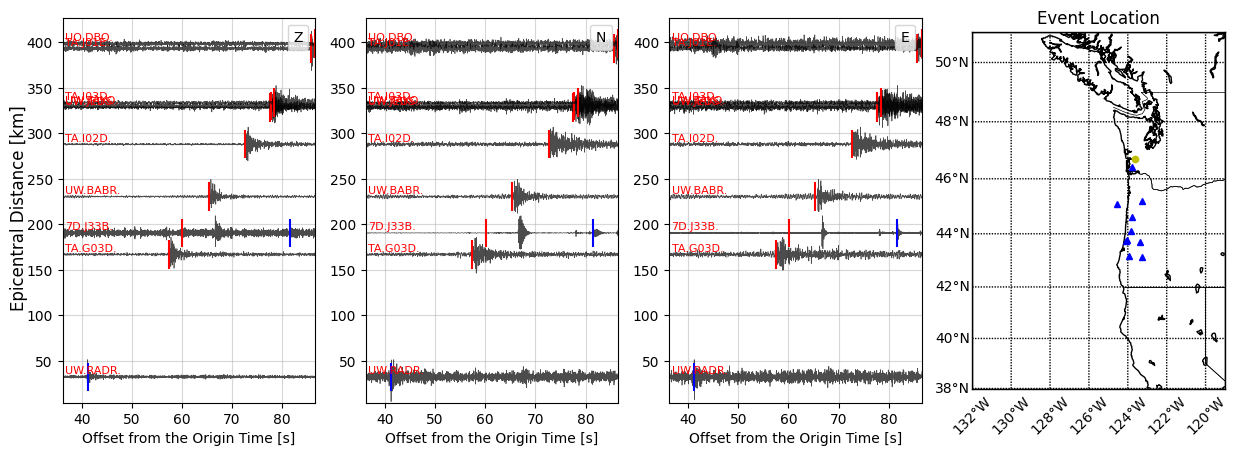

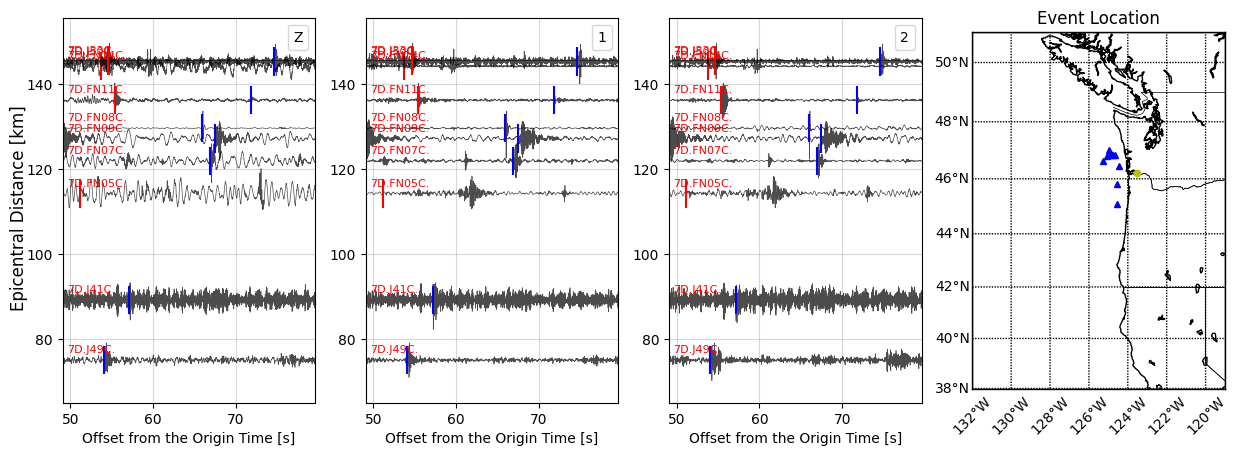

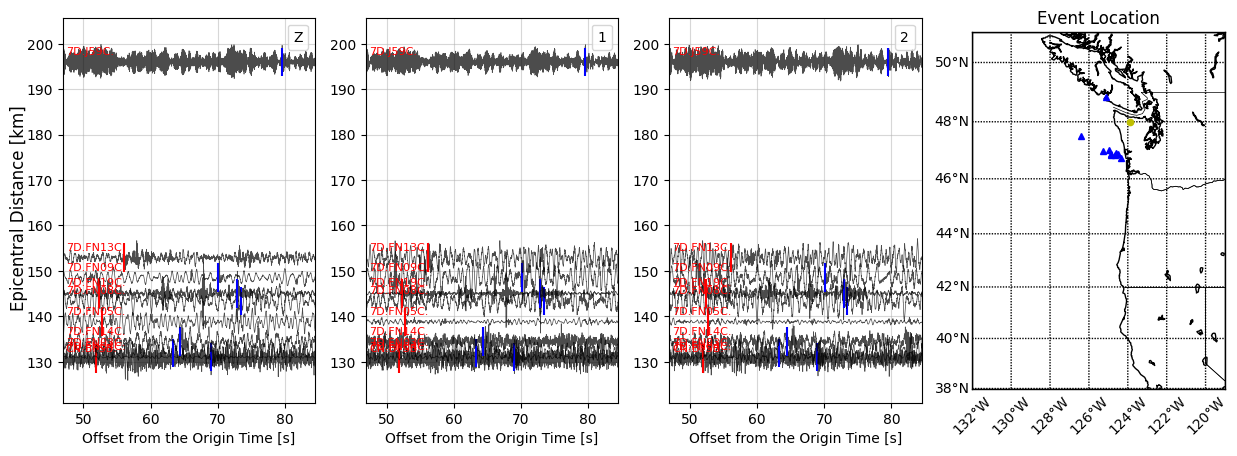

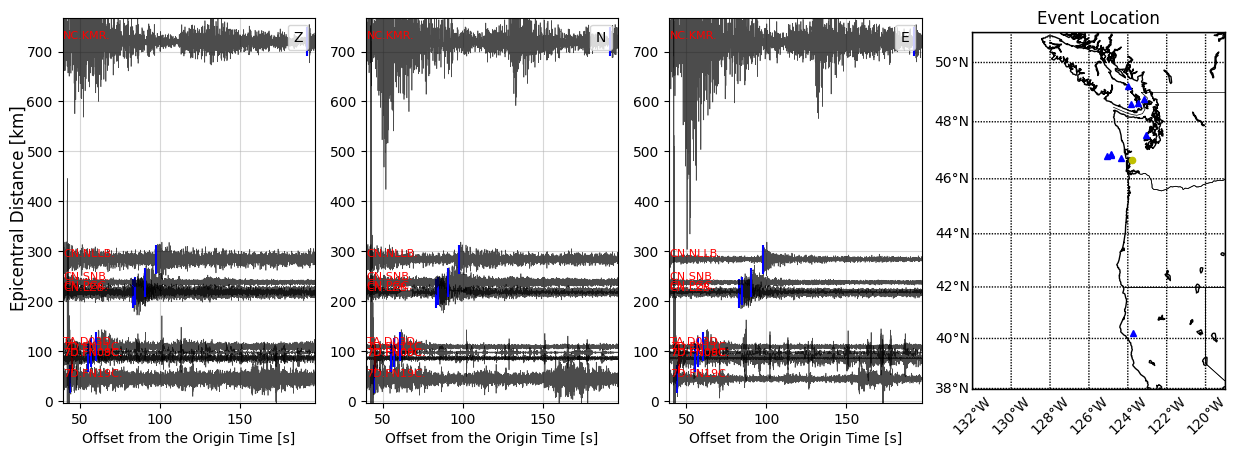

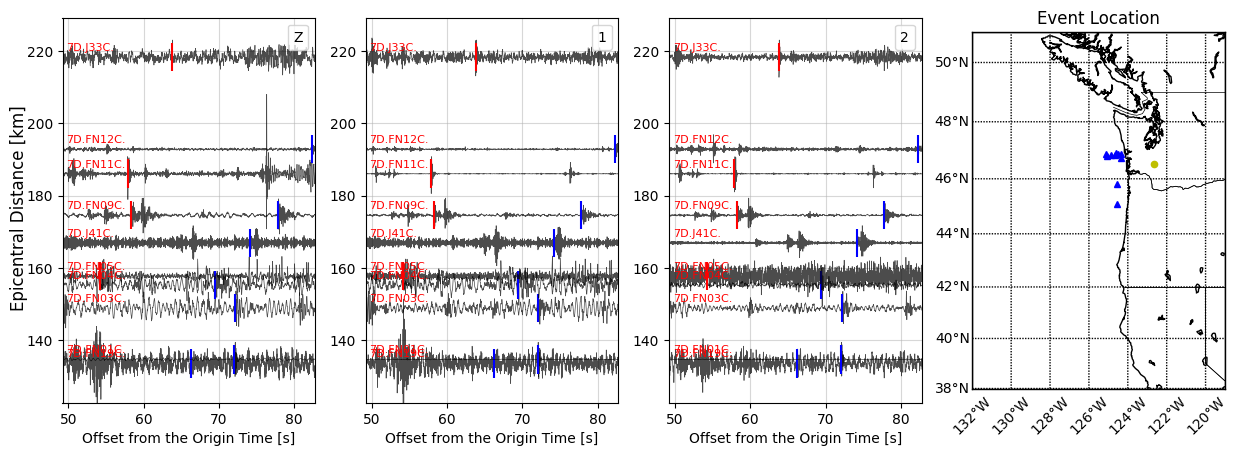

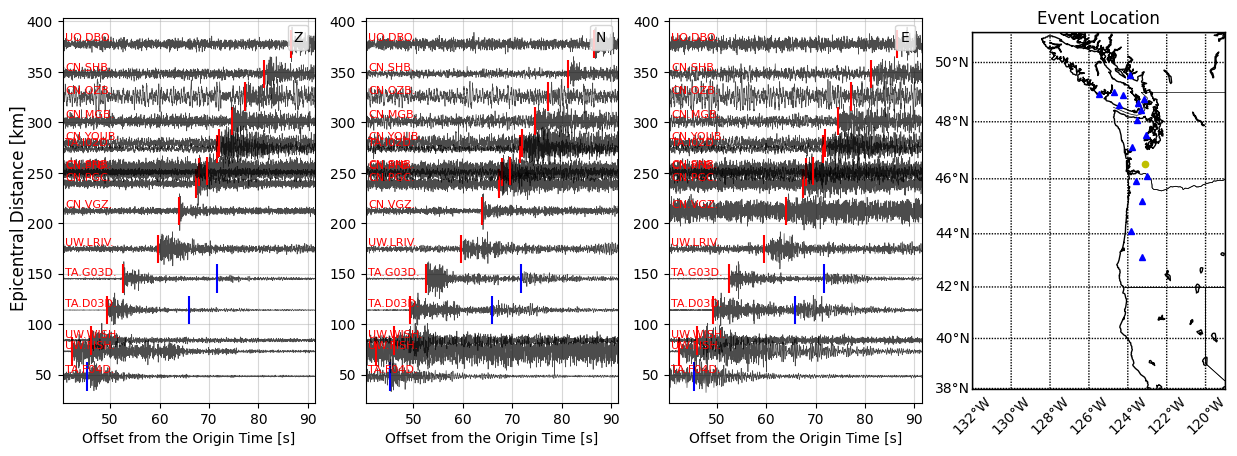

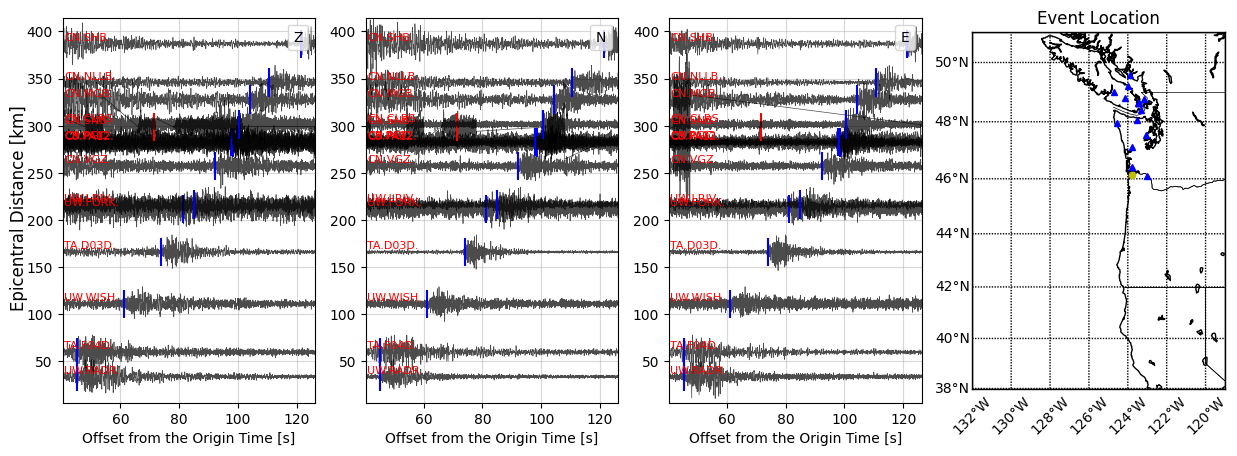

In [9]:
# Pick only the events less than 10 km deep
year = 'all_regions'
new_events = pd.read_csv(f'/home/hbito/cascadia_obs_ensemble_backup/data/datasets_{year}/new_events_reloc_cog_120s_1000km.csv')

picks = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/Cascadia_catalog_picks_ver_1.csv')
picks = picks.rename(columns={' ID ':'idx',' Station Name':'station'})

# station_info = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/station_info_Cascadia_catalog_ver_1.csv')

mycatalog_picks = new_events.merge(picks, on='idx', how='left')
# mycatalog_picks = mycatalog_picks.merge(station_info, on='station', how='left')

mycatalog_picks = mycatalog_picks.rename(columns={'datetime':'time','Date':'time_pick',' Phase Type':'phase',' Pick ID':'pick_idx',' Num. Sta':'picks'})

picks = mycatalog_picks

picks = picks.loc[(picks['picks']>=10)&(picks['longitude']>=-124)&(picks['longitude']<=-122)
                           &(picks['latitude']>=46)&(picks['latitude']<=48)]

pick_idx = picks.idx.unique()[:]
picks_selected = picks[picks.idx.isin(pick_idx)]
picks_selected.loc[:, 'phase'] = picks_selected['phase'].str.replace(' ', '')
picks_selected.loc[:, 'station'] = picks_selected['station'].str.replace(' ', '')
picks_selected.loc[:, 'station'] = picks_selected['station'].apply(lambda x: x + '.')
fig_title = f''
dir = '/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/plots_fig3_new_events_reloc_cog_pnsn_wa' \
'/'
subplot_waveforms_no_title(picks_selected,dir)

/tmp/ipykernel_2564515/4293473404.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  picks_selected.loc[:, 'phase'] = picks_selected['phase'].str.replace(' ', '')
/tmp/ipykernel_2564515/4293473404.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  picks_selected.loc[:, 'station'] = picks_selected['station'].str.replace(' ', '')
/tmp/ipykernel_2564515/4293473404.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

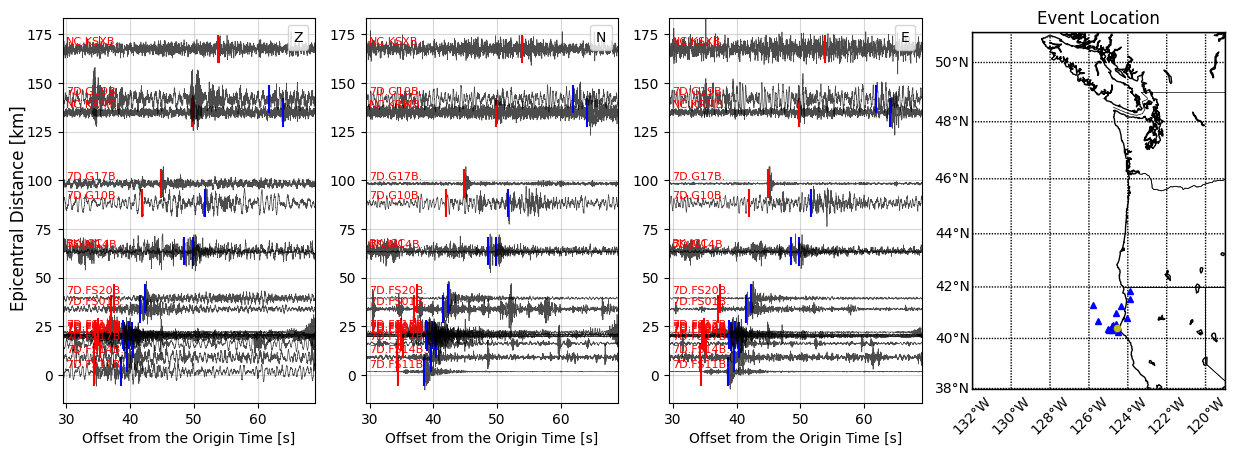

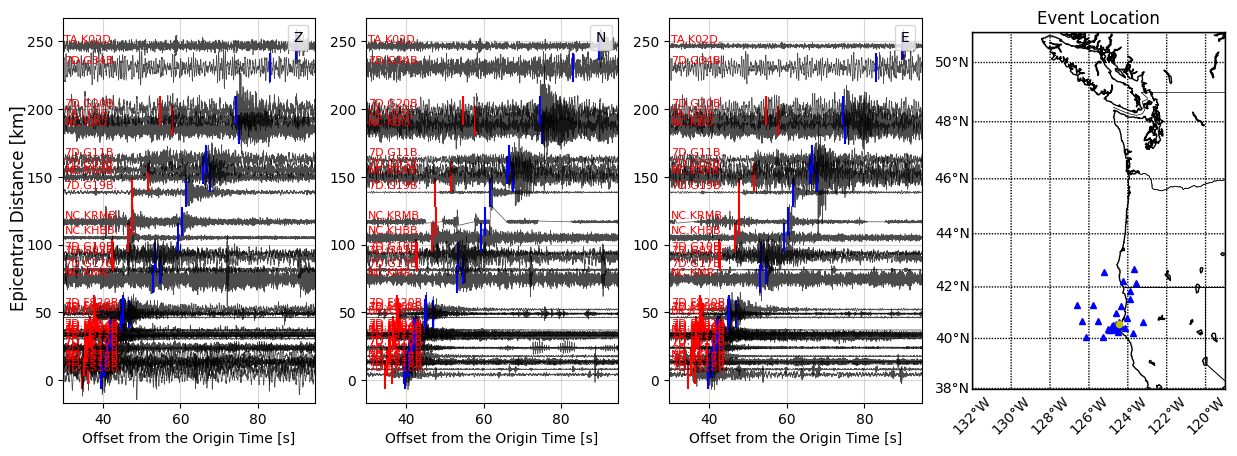

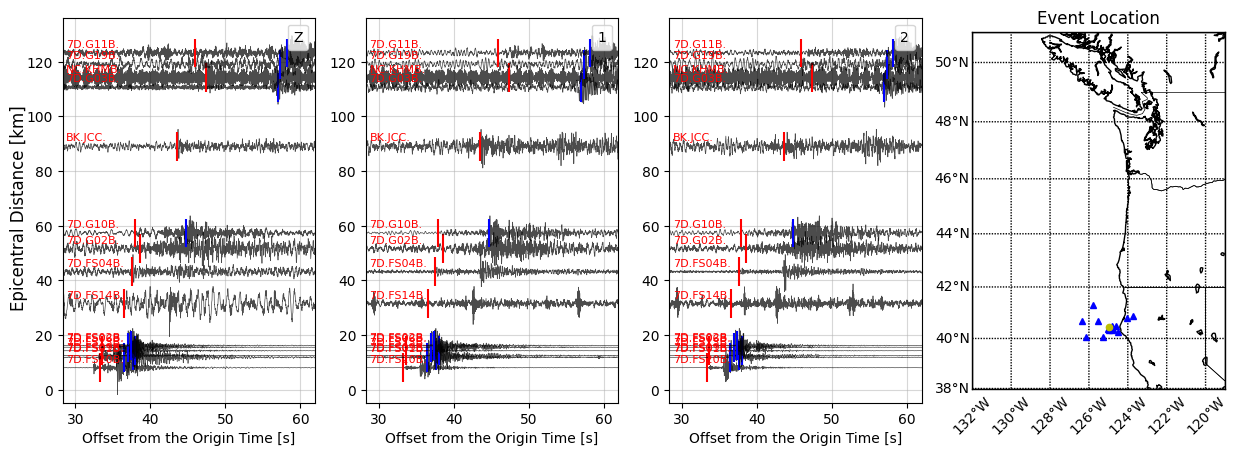

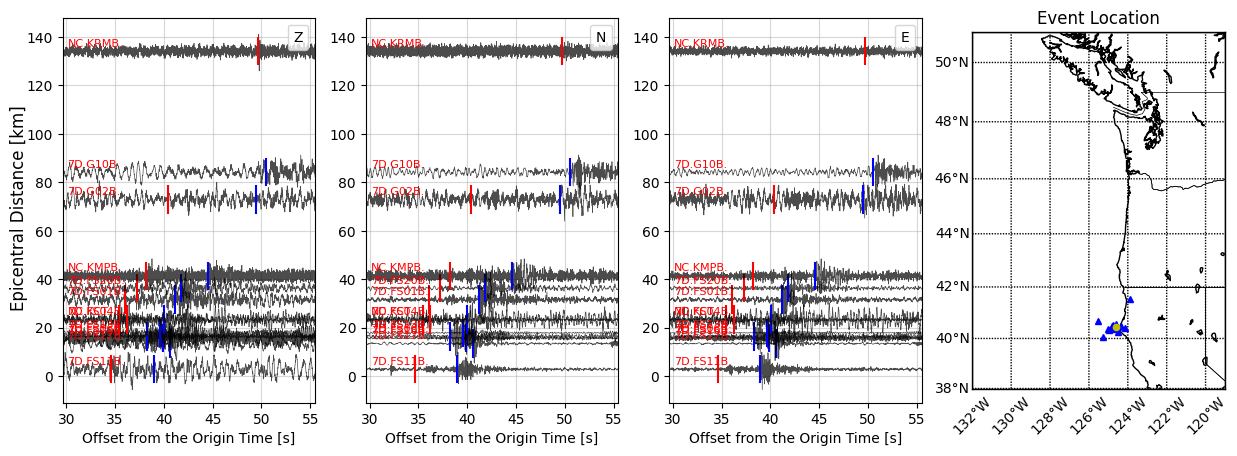

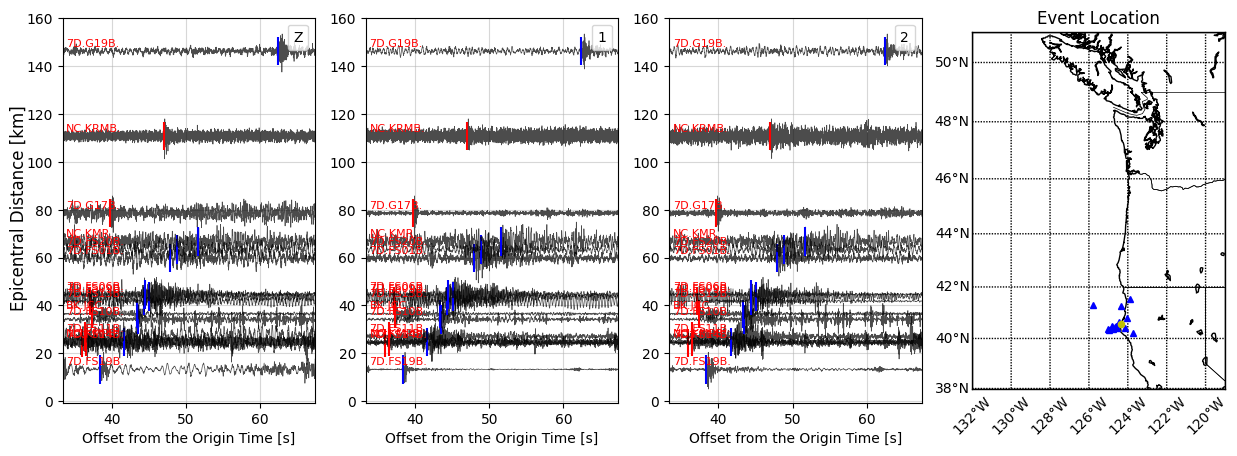

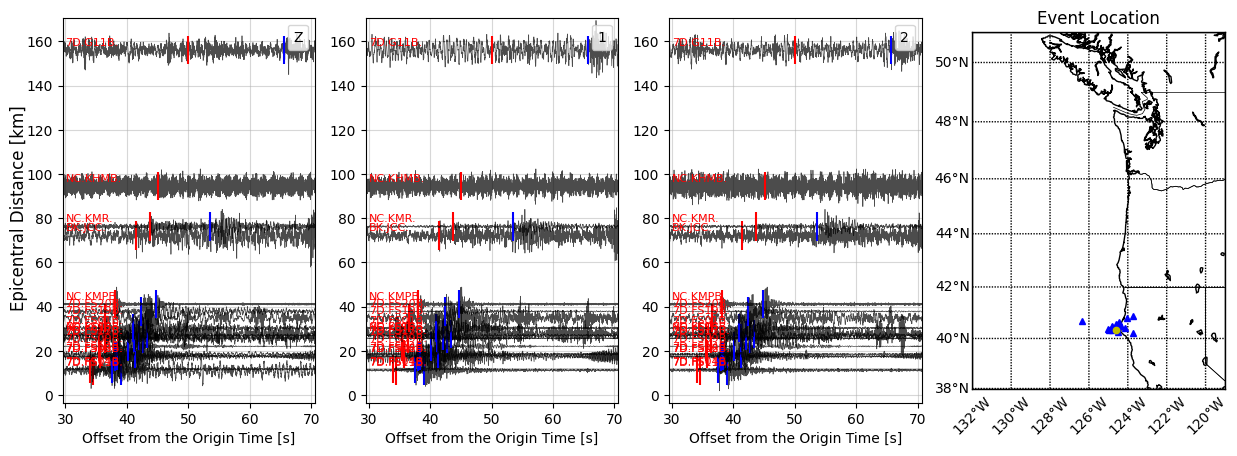

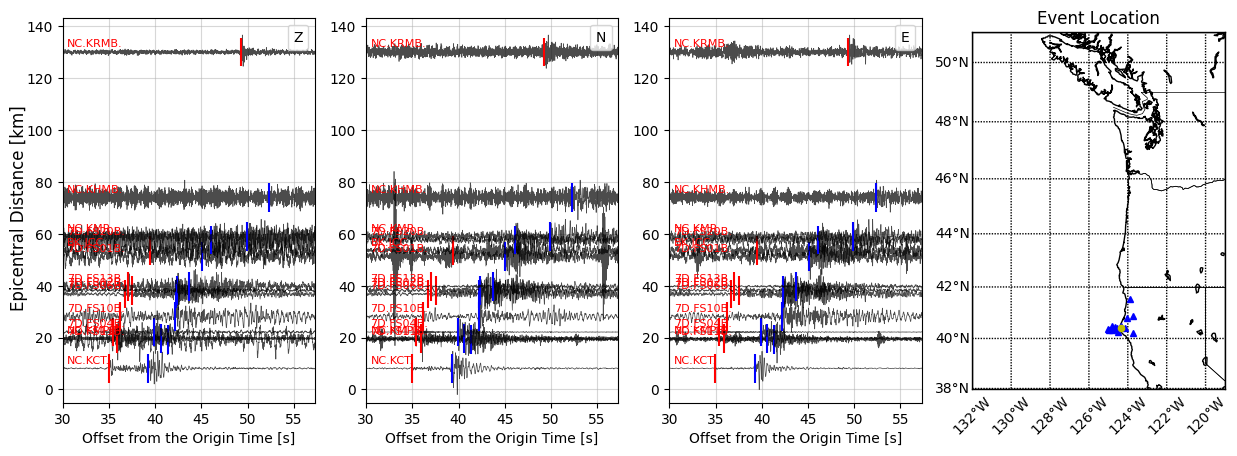

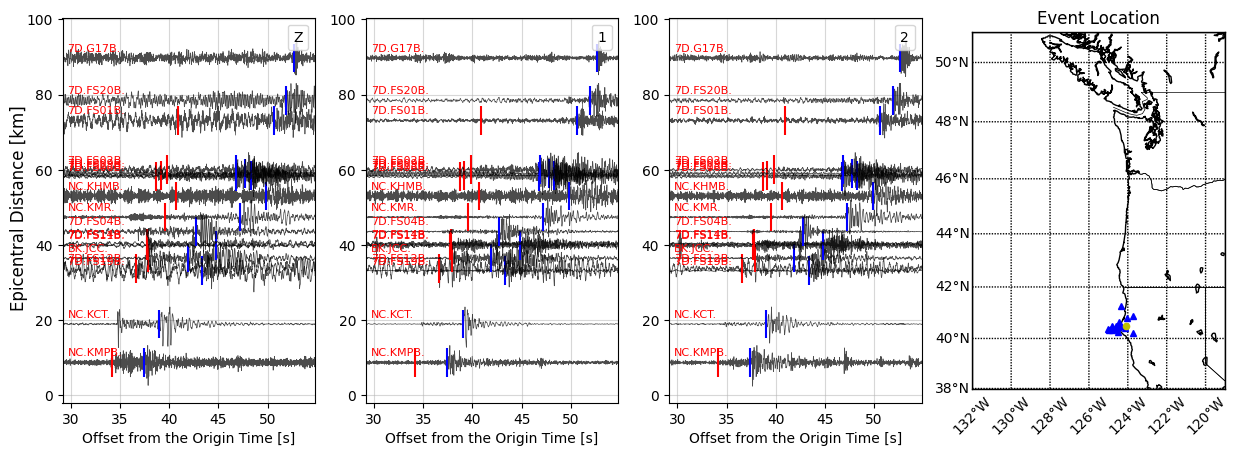

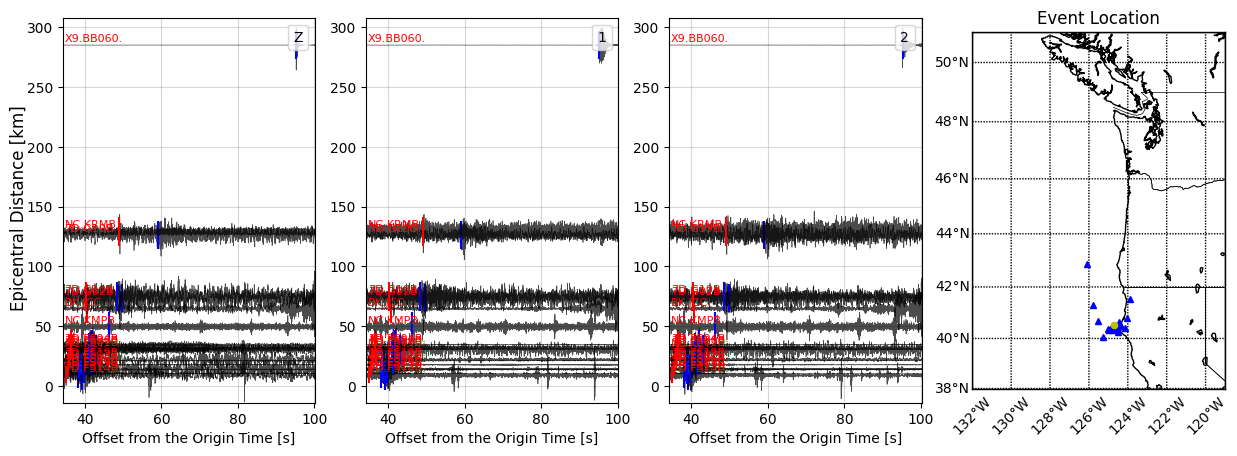

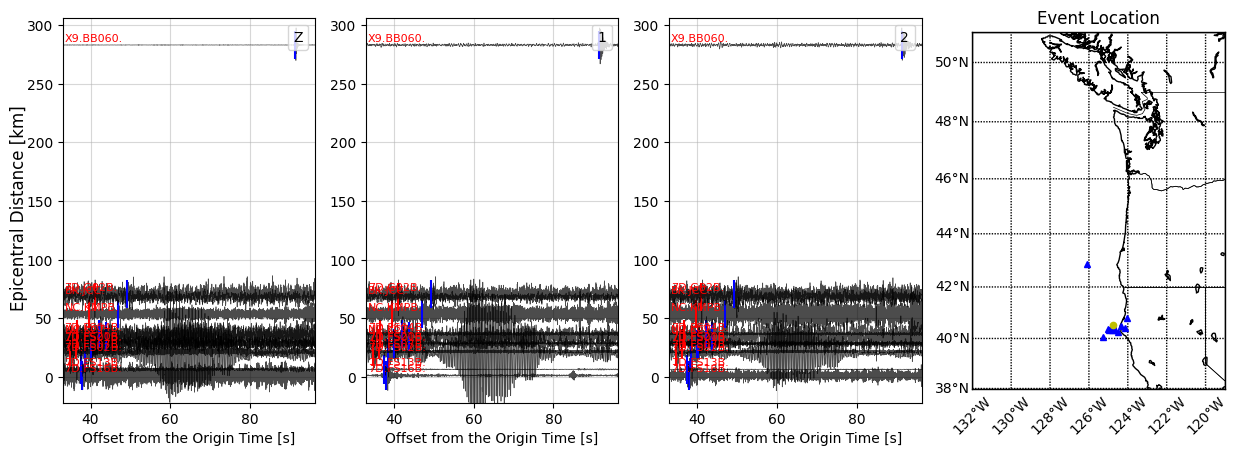

In [13]:
# Pick only the events less than 10 km deep
year = 'all_regions'
new_events = pd.read_csv(f'/home/hbito/cascadia_obs_ensemble_backup/data/datasets_{year}/new_events_reloc_cog_120s_1000km.csv')

picks = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/Cascadia_catalog_picks_ver_1.csv')
picks = picks.rename(columns={' ID ':'idx',' Station Name':'station'})

# station_info = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/station_info_Cascadia_catalog_ver_1.csv')

mycatalog_picks = new_events.merge(picks, on='idx', how='left')
# mycatalog_picks = mycatalog_picks.merge(station_info, on='station', how='left')

mycatalog_picks = mycatalog_picks.rename(columns={'datetime':'time','Date':'time_pick',' Phase Type':'phase',' Pick ID':'pick_idx',' Num. Sta':'picks'})

picks = mycatalog_picks

picks = picks.loc[(picks['picks']>=10)&(picks['longitude']>=-128)&(picks['longitude']<=-124)
                           &(picks['latitude']>=38)&(picks['latitude']<=42)]

pick_idx = picks.idx.unique()[500:510]
picks_selected = picks[picks.idx.isin(pick_idx)]
picks_selected.loc[:, 'phase'] = picks_selected['phase'].str.replace(' ', '')
picks_selected.loc[:, 'station'] = picks_selected['station'].str.replace(' ', '')
picks_selected.loc[:, 'station'] = picks_selected['station'].apply(lambda x: x + '.')
fig_title = f''
dir = '/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/plots_fig3_new_events_reloc_cog_mendocino' \
'/'
subplot_waveforms_no_title(picks_selected,dir)

In [9]:
region = 'all_regions'
events = pd.read_csv(f'/home/hbito/cascadia_obs_ensemble_backup/data/datasets_{region}/Cascadia_relocated_catalog_ver_3.csv')

picks = pd.read_csv('/home/hbito/cascadia_obs_ensemble_backup/data/datasets_all_regions/Cascadia_relocated_catalog_picks_ver_3.csv')
events = events.rename(columns={' Event ID ':'idx',' Origin Time (UTC)':'time','Latitude':'latitude',' Longitude':'longitude',' Depth (km)':'depth',' Num. P':'Num. P', ' Num. S':'Num. S',' RMS Residual (s)':'RMS Residual (s)',' Detection Value': 'Detection Value',' Std. (km)':'Std. (km)'})
picks = picks.rename(columns={' Event ID':'idx',' Station Name':'station', ' Phase Type':'phase',' Pick ID ':'arid','Pick Time (UTC)':'time_pick',' Residual (s)':'timeres'})
events['datetime'] = pd.to_datetime(events['time'], utc=True)
picks['station'] = picks['station'].str.strip()
# Flip the order of the station name and network name
picks['station'] = picks['station'].apply(lambda x: '.'.join(x.split('.')[::-1]))
picks['phase'] = picks['phase'].replace({0: 'P', 1: 'S'})
picks = picks.merge(events, on='idx', how='left')
mycatalog_picks = picks
mycatalog_picks

time_pick  station phase  timeres    idx     arid  \
0        2010-01-01T00:15:27.180000Z  UW.PCMD     P    0.049      0        0   
1        2010-01-01T00:15:37.840400Z   UW.RVW     P    1.264      0        1   
2        2010-01-01T00:15:33.280000Z  UW.PCMD     S   -0.243      0        2   
3        2010-01-01T00:15:42.002000Z   UW.GNW     S    2.402      0        3   
4        2010-01-01T00:15:43.618400Z  PB.B013     S   -0.651      0        4   
...                              ...      ...   ...      ...    ...      ...   
1004330  2015-06-23T23:18:40.885798Z  7D.J11D     S    0.044  63886  1004330   
1004331  2015-06-23T23:18:48.573898Z  7D.G35D     S    0.358  63886  1004331   
1004332  2015-06-23T23:18:50.458298Z  7D.J19D     S    0.300  63886  1004332   
1004333  2015-06-23T23:18:56.689277Z  7D.J10D     S    0.432  63886  1004333   
1004334  2015-06-23T23:19:03.103800Z  7D.J27D     S    0.124  63886  1004334   

         latitude  longitude   depth                          time  Std. (km)  \
0        47.22533 -122.16895  56.111   2010-01-01T00:15:17.262282Z       0.79   
1        47.22533 -122.16895  56.111   2010-01-01T00:15:17.262282Z       0.79   
2        47.22533 -122.16895  56.111   2010-01-01T00:15:17.262282Z       0.79   
3        47.22533 -122.16895  56.111   2010-01-01T00:15:17.262282Z       0.79   
4        47.22533 -122.16895  56.111   2010-01-01T00:15:17.262282Z       0.79   
...           ...        ...     ...                           ...        ...   
1004330  43.37085 -127.35251   5.915   2015-06-23T23:18:18.841147Z       0.37   
1004331  43.37085 -127.35251   5.915   2015-06-23T23:18:18.841147Z       0.37   
1004332  43.37085 -127.35251   5.915   2015-06-23T23:18:18.841147Z       0.37   
1004333  43.37085 -127.35251   5.915   2015-06-23T23:18:18.841147Z       0.37   
1004334  43.37085 -127.35251   5.915   2015-06-23T23:18:18.841147Z       0.37   

         Detection Value  Num. P  Num. S  RMS Residual (s)  \
0                  0.680       2       5             1.081   
1                  0.680       2       5             1.081   
2                  0.680       2       5             1.081   
3                  0.680       2       5             1.081   
4                  0.680       2       5             1.081   
...                  ...     ...     ...               ...   
1004330            0.694       4       5             0.447   
1004331            0.694       4       5             0.447   
1004332            0.694       4       5             0.447   
1004333            0.694       4       5             0.447   
1004334            0.694       4       5             0.447   

                                datetime  
0       2010-01-01 00:15:17.262282+00:00  
1       2010-01-01 00:15:17.262282+00:00  
2       2010-01-01 00:15:17.262282+00:00  
3       2010-01-01 00:15:17.262282+00:00  
4       2010-01-01 00:15:17.262282+00:00  
...                                  ...  
1004330 2015-06-23 23:18:18.841147+00:00  
1004331 2015-06-23 23:18:18.841147+00:00  
1004332 2015-06-23 23:18:18.841147+00:00  
1004333 2015-06-23 23:18:18.841147+00:00  
1004334 2015-06-23 23:18:18.841147+00:00  

[1004335 rows x 16 columns]